# House Price Project 

The steps involved in solving a basic Machine Learning problem include:
1. Defining the problem
2. Data Pre-processing 
3. Feature Engineering and Data Cleaning
4. Splitting the data into our Test and Training sets
5. Using a ML algorithm that would solve our problem in the best way possible.
6. Training the model on our training data.
7. Evaluating the performance of the model using our Test data. 
8. Using certain Hyperparameter tuning methods to improve our models performance. 


#### 1. Defining the problem

The purpose of the project is to predict the price of a house based on the features provided. 

In [2]:
# Import the Basic Libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset donwloaded from Kaggle into the notebook 

housing_data = pd.read_csv(r'C:\Users\poonam and pratiti\OneDrive\Desktop\ML and Python\Machine Learning From the Ground Up\Linear Regression\House_Pricing_Lin.Reg\Bengaluru_House_Data.csv')

In [4]:
housing_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


The independent variables in this dataset are, area_type, availability, location,size, society, total_sqft, bath, balcony. 
The dependent variable in this dataset is the price. Which is also our target variable. 


In [5]:
# shape gives us the no. of rows and columns.

housing_data.shape

(13320, 9)

In [6]:
housing_data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features. Which is why feature selection plays a very important role in deciding how accurate your model will be. 

To perform feature selection a very common method is to generate a correlation heatmap matrix. This shows us the correlation of each feature with the target variable and how influential it is in deciding the value of the target. 

In this case however, we will perform feature selection by basing it off of some assumptions from our understanding of the data. 

In [7]:
df = housing_data.drop(['area_type', 'availability', 'society'], axis=1)
df.head()



,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
#shape of new dataframe with dropped features
df.shape

# as we can see from this, the number of rows has reduced from 9 to 6, since we dropped three columns

(13320, 6)

#### Data Cleaning

The process of data cleaning starts with removing the NaN values 

In [9]:
df2 = df.isna().sum()
df2

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

From this we see that balcony has a large number of NaN values and we know that the number of balconies in a house doesn't highluy affect the price of the house. So based off of our assumptions we drop the 'balcony' feature as well.

In [10]:
df_updated = df.drop(['balcony'], axis=1)
df_updated.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df3 = df_updated.isna().sum()
df3.head()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

There are two ways to deal with NaN values. One way is to drop all the NaN values, the other way is to replace the NaN values with the median of the values in that feature. So say, there are 73 NaN values in the bath feature, what we can do is we find the median of the values in the bath column and we replace the NaN values with that value. 

In this case, the number of rows with NaN values are quite low as compared to the total number of rows. So dropping 73 rows out of a total of 13320 rows, won't cause a loss of too much information. 

In [12]:
data_clean = df_updated.dropna()
df4 = data_clean.isna().sum()
df4

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

From this we can see that the 'data_clean' dataset, now has no null values. 

#### Exploring Features

The next step in the process is exploring the features. Seeing how the data is given to us and if we need to make any changes so that the data of a specific feature is uniform. 

In [13]:
data_clean.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


We notice that the size feature has data given as '2 BHK' and '4 Bedroom'. Although it means the same to us, we need to modify it so that it maintains uniformity. 

In [14]:
# exploring the 'size' feature
data_clean['size'].unique() # shows us all the unique values in the data in that column specified.


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
data_clean['BHK'] = data_clean['size'].apply(lambda x: int(x.split(' ')[0]))
data_clean

C:\Users\poonam and pratiti\AppData\Local\Temp/ipykernel_31880/858229059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['BHK'] = data_clean['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


Now we don't need the 'size' column so we can drop it

In [16]:
data_clean_1 = data_clean.drop(['size'], axis=1)
data_clean_1.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [17]:
# exploring the 'total_sqft' features data
data_clean_1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We notice that in the 'total_sqft' column we have some data points that are given as a range. We want to convert that into a single number. 

We create a function that tells us if a given value in the total_sqft column is a float or not. 

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
data_clean_1[~data_clean_1['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


We see that there are certain features which have the sqft given as sq.meter and Acres as well. We will just drop those columns and deal with the range values. 

In [20]:
def to_float(x):
    y = x.split("-")
    if len(y) == 2:
        return float((float(y[0]) + float(y[1]))/2)
    try:
        return float(x)
    except:
        return None
    

In [21]:
data = data_clean_1.copy()
data['total_sqft'] = data['total_sqft'].apply(to_float)
data.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

we see that the data under total_sqft has been changed to the average of the range.

#### Feature Engineering

In [22]:
df5 = data.copy()
df5.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


We want to create a new column that gives us the price of the house per sqft. 

In [23]:
df5['price/sqft'] = df5['price']*100000/df5['total_sqft']

df5.head()

,location,total_sqft,bath,price,BHK,price/sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


We created a new column for the price/sqft. We basically, divided the price (in lakh)*100000 with the total_sqft.

We notice that the new column data has a lot of decimal places so we can round it off to the nearest two decimal places.

In [24]:
df5.location.unique()


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
len(df5.location.unique())

# tells me that there are 1304 different locations in my dataset 

1304

In [26]:
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
len(location_stats[location_stats<=10])

1052

We see that there are locations that have datapoints less than 10, so we label them as other locations 

In [28]:
other_locations = location_stats[location_stats<=10]
other_locations 

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [29]:
df5.location = df5.location.apply(lambda x: 'other' if x in other_locations else x )


In [30]:
len(df5.location.unique())

242

#### Detecting and Removing Outliers

In [31]:
df5.head(10)

,location,total_sqft,bath,price,BHK,price/sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [32]:
df5.shape

(13246, 6)

In [33]:
df5[df5['total_sqft']/df5['BHK']<=300].head()

,location,total_sqft,bath,price,BHK,price/sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [34]:
df6 = df5[~(df5['total_sqft']/df5['BHK']<=300)]
df6.shape

(12320, 6)

In [35]:
df6['price/sqft'].describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price/sqft, dtype: float64

We see that there are certain prices that are very high or very low, these are our outliers. To make our model more accurate, we remove the outliers from the data. 

To do this we will write a function that will take values from our dataset, this is then passed into a for loop that iterates over every individual element, finding the mean, standard deviation. Once that's done it chooses only those values that lie in the range (mean-std,mean+std), these values are then concatenated to the output dataframe.

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price/sqft'])
        st = np.std(subdf['price/sqft'])
        reduced_df = subdf[(subdf['price/sqft']>(m-st)) & (subdf['price/sqft']<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

df7.head

<bound method NDFrame.head of                   location  total_sqft  bath   price  BHK    price/sqft
0      1st Block Jayanagar      2850.0   4.0  428.00    4  15017.543860
1      1st Block Jayanagar      1630.0   3.0  194.00    3  11901.840491
2      1st Block Jayanagar      1875.0   2.0  235.00    3  12533.333333
3      1st Block Jayanagar      1200.0   2.0  130.00    3  10833.333333
4      1st Block Jayanagar      1235.0   2.0  148.00    2  11983.805668
...                    ...         ...   ...     ...  ...           ...
10011                other      1353.0   2.0  110.00    2   8130.081301
10012                other       812.0   1.0   26.00    1   3201.970443
10013                other      1440.0   2.0   63.93    3   4439.583333
10014                other      1075.0   2.0   48.00    2   4465.116279
10015                other      3600.0   5.0  400.00    4  11111.111111

[10016 rows x 6 columns]>

From our dataset, we see there are multiple instances where we have a 2 bhk and 3 bhk house with almost similar sqft. area, these outliers and errors are removed using a scatter plot.

In [37]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2bhk', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label ='3bhk', s = 50)
    plt.xlabel('Total Sqft. of House')
    plt.ylabel('Price of House')
    plt.title(location)
    plt.legend()


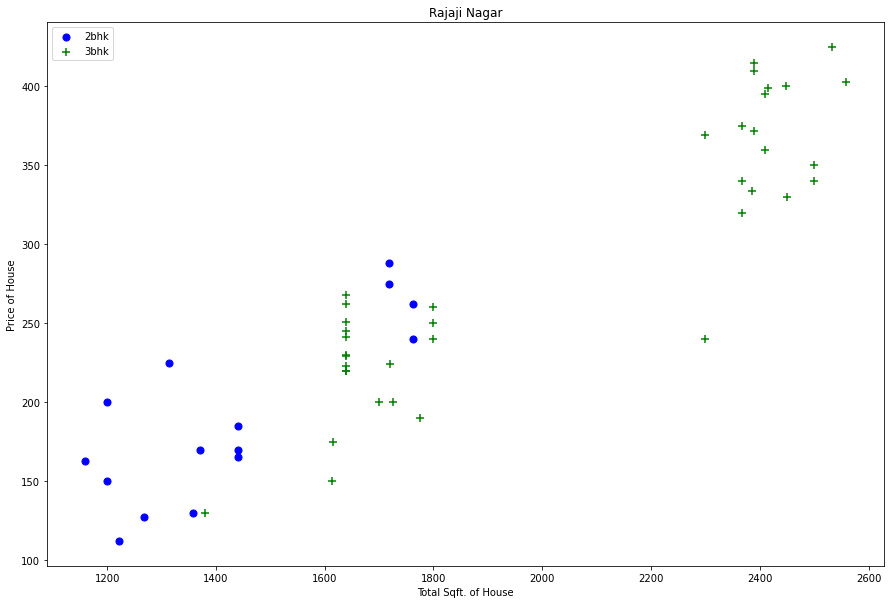

In [38]:
plot_scatter_chart(df7, "Rajaji Nagar")

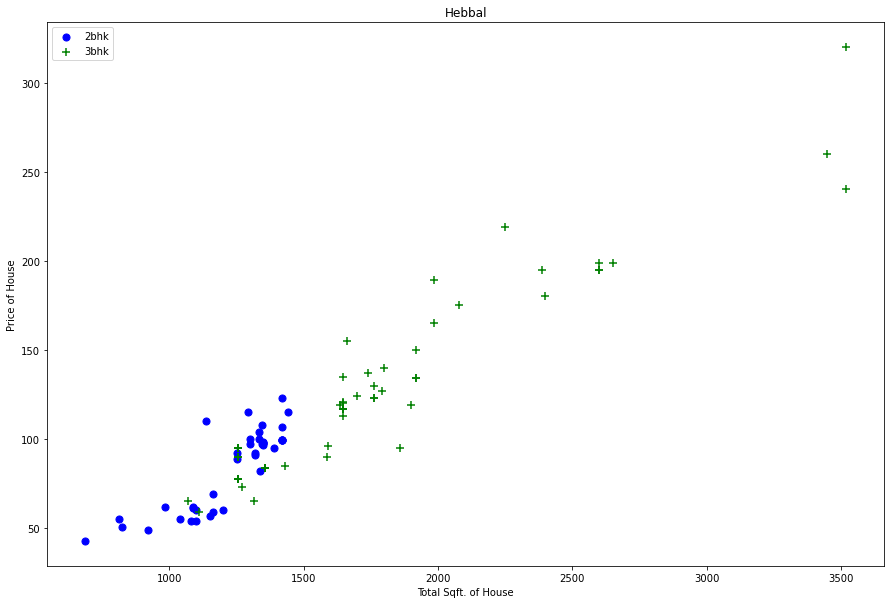

In [39]:
plot_scatter_chart(df7, "Hebbal")

In [40]:
sample_df = df7.groupby('location')
sample_df.first()

,total_sqft,bath,price,BHK,price/sqft
location,,,,,
1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1st Phase JP Nagar,2825.0,4.0,250.00,4,8849.557522
2nd Phase Judicial Layout,1450.0,2.0,50.75,3,3500.000000
2nd Stage Nagarbhavi,1500.0,4.0,220.00,4,14666.666667
5th Block Hbr Layout,1206.0,2.0,56.00,2,4643.449420
...,...,...,...,...,...
Yelahanka,1600.0,2.0,75.00,3,4687.500000
Yelahanka New Town,650.0,1.0,33.00,1,5076.923077
Yelenahalli,1240.0,2.0,47.12,2,3800.000000


In [41]:
def bhk_outliers_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price/sqft']),
                'st' : np.std(bhk_df['price/sqft']),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price/sqft']<(stats['mean'])].index.values)
            return df.drop(exclude_indices, axis='index')

In [42]:
df8 = bhk_outliers_remover(df7)
df8.shape

(10016, 6)

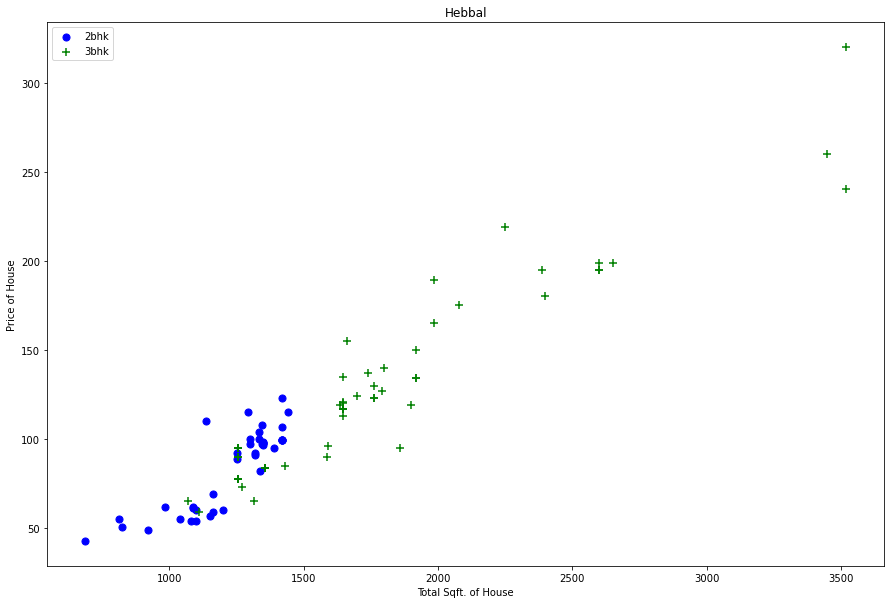

In [43]:
plot_scatter_chart(df8, 'Hebbal')

#### Plotting a histogram 

To see how many houses are there per sqft. 

Text(0, 0.5, 'Count')

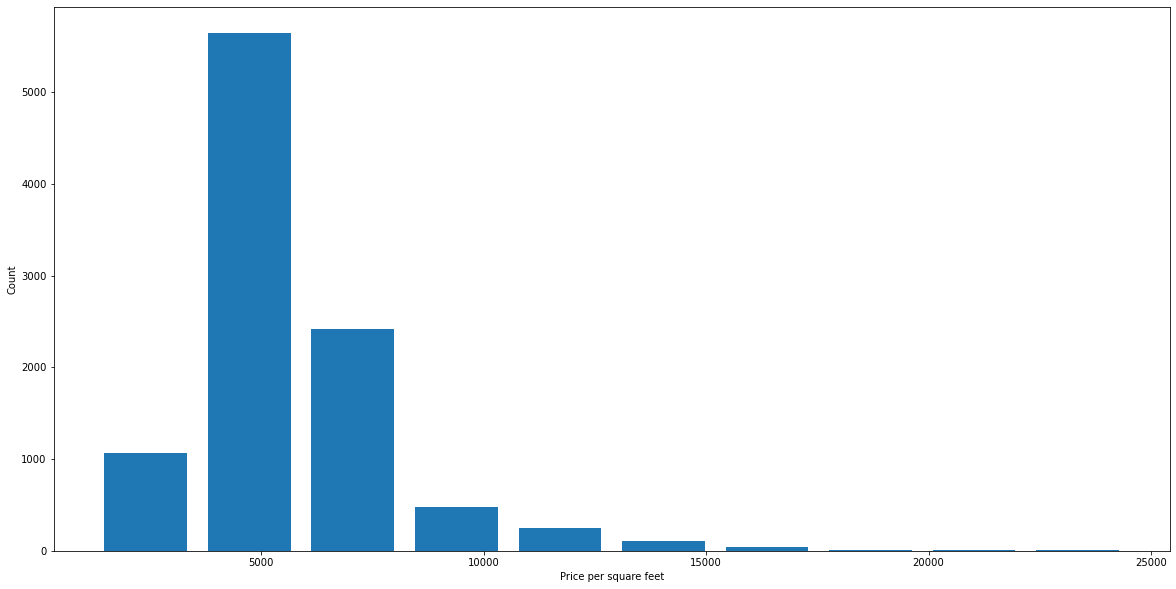

In [44]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8['price/sqft'], rwidth = 0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

Now, exploring the bathroom data.

In [48]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

We see that there are houses with 13 bathrooms. 

In [50]:
df8[df8.bath>10]

,location,total_sqft,bath,price,BHK,price/sqft
5138,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8307,other,12000.0,12.0,525.0,10,4375.000000
8392,other,10000.0,16.0,550.0,16,5500.000000
9106,other,6000.0,12.0,150.0,11,2500.000000
9431,other,5425.0,13.0,275.0,13,5069.124424


We see that there are certain houses that have 13 baths with only 5000 something sqft. area. This is quite unusual. Therefore, by intiuition we decide that all houses with bathroom that are two times more than the number of bedrooms, we will remove.

Text(0, 0.5, 'Number of Bedrooms')

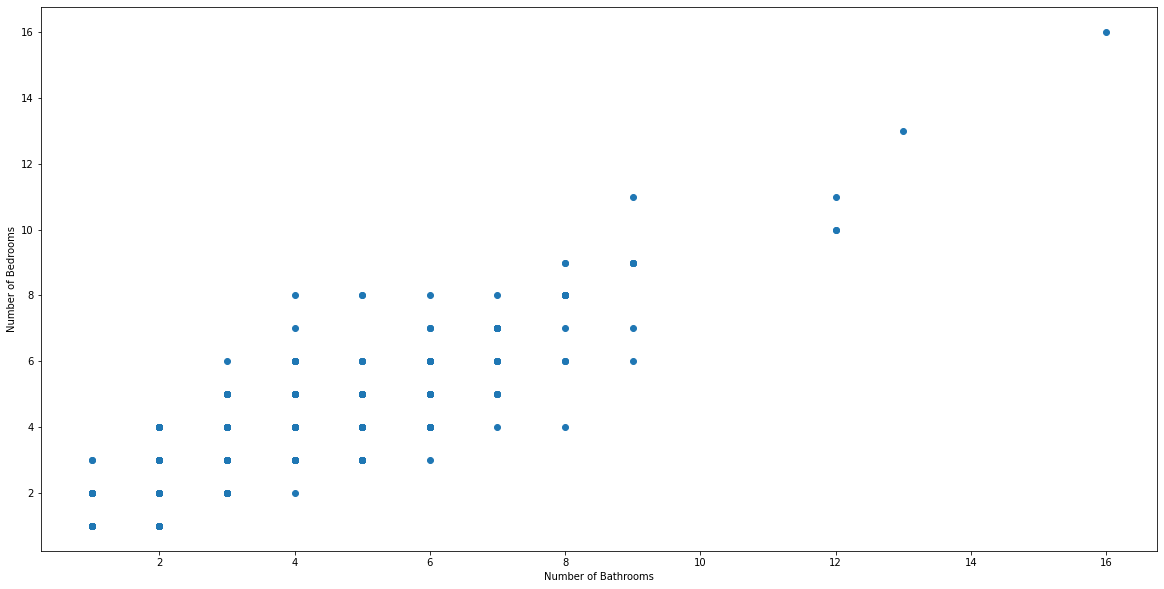

In [54]:
plt.scatter(df8.bath, df8.BHK)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Bedrooms')

Text(0, 0.5, 'Count')

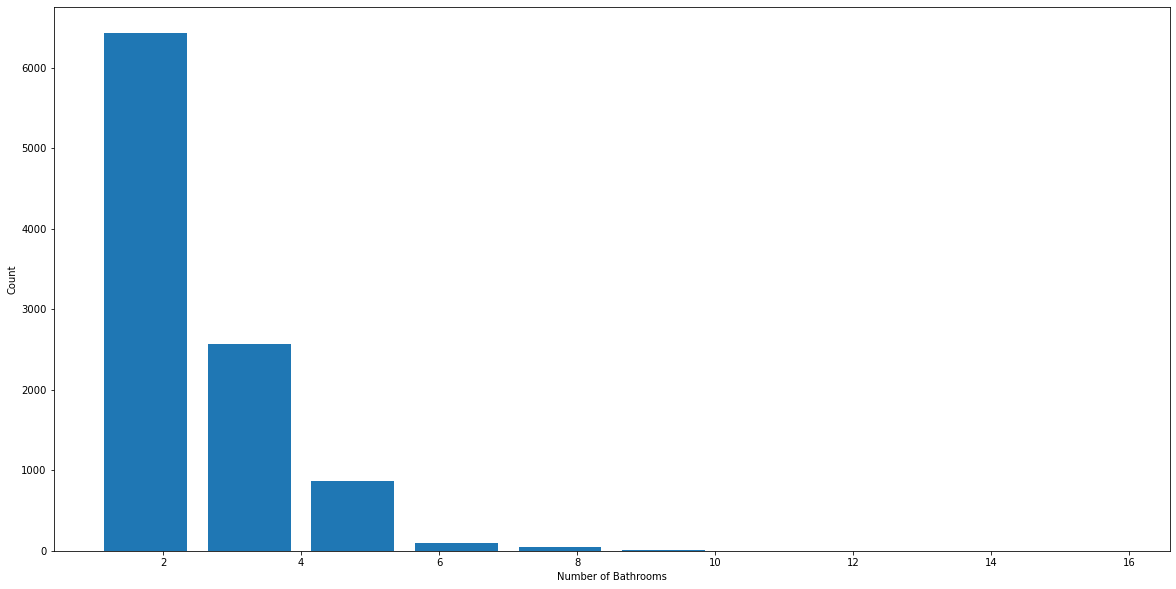

In [55]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

We see that most houses have 2 bathrooms, but we also have some outliers, or houses that have around 10-16 bathrooms

In [57]:
df9 = df8[df8.bath<df8.BHK + 2]
df9.shape

(9925, 6)

In [60]:
df10 = df9.drop('price/sqft', axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


We know that machine learning models can't take in categorical data. So we have to find a way to encode the 'location' column and represent it as numbers. 

For this we will use, the one hot encoding method.

In [61]:
encoded_data = pd.get_dummies(df10.location)
encoded_data.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df11 = pd.concat([df10, encoded_data.drop('other', axis=1)], axis=1)
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Notice that we dropped, one column from the encoded data while appending to the dataframe. This is done to avoid an error, and overall has no change on the output since that column is simply represented as when all other columns have values = 0.

In [64]:
df12 = df11.drop('location', axis=1)
df12.shape

(9925, 245)

Now we assign the values to the independent and dependent vectors X and y for model training

In [65]:
X = df12.drop('price', axis=1)
X.head() #independent variables

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y = df12.price
y.head() #dependent/target variable

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =10)

In [69]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8142488423761343

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cv_score = cross_val_score(LinearRegression(), X, y, cv=cv)

In [73]:
np.mean(cv_score)

0.8035177507645977

In [74]:
def price_predict(location, sqft, bath, BHK):
    loc_index = np.where(X.columns == location)[0][0]

    x =np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    if loc_index>0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [75]:
price_predict('1st Phase JP Nagar', 1000, 2, 2)

93.19837692019473

In [76]:
price_predict('Indira Nagar', 1500, 2, 2)

207.52391678393676